In [1]:
#imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/raw/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
##split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
##train
lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]


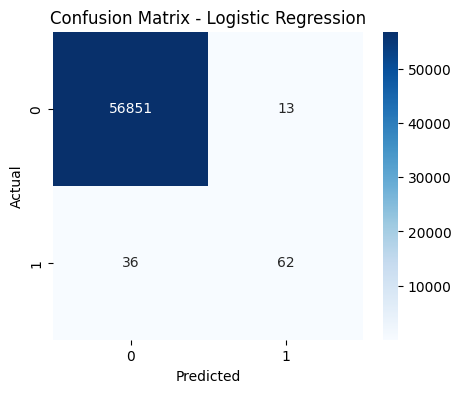

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



In [10]:
print(classification_report(y_test, y_pred, digits=4))



              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8267    0.6327    0.7168        98

    accuracy                         0.9991     56962
   macro avg     0.9130    0.8162    0.8582     56962
weighted avg     0.9991    0.9991    0.9991     56962



In [11]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc


np.float64(0.9605494455801453)

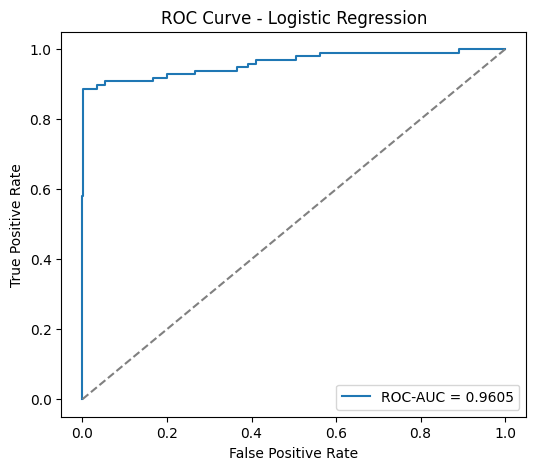

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [13]:
## Class weighting penalizes misclassification of the minority (fraud) class more heavily, encouraging the model to detect fraud cases.


In [14]:
lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

lr_balanced.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [15]:
y_pred_bal = lr_balanced.predict(X_test_scaled)
y_proba_bal = lr_balanced.predict_proba(X_test_scaled)[:, 1]


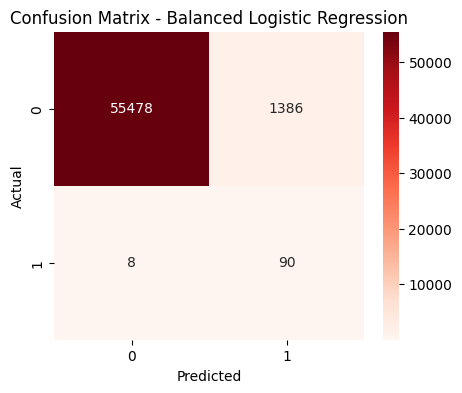

In [16]:
cm_bal = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(5,4))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.show()


In [17]:
print(classification_report(y_test, y_pred_bal, digits=4))


              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



In [18]:
roc_auc_bal = roc_auc_score(y_test, y_proba_bal)
roc_auc_bal


np.float64(0.9720834996210077)

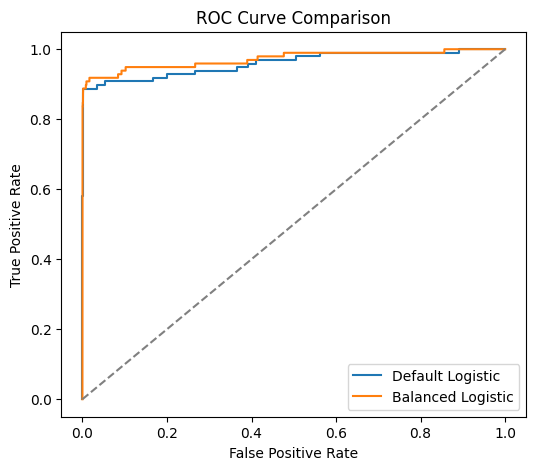

In [19]:
fpr_def, tpr_def, _ = roc_curve(y_test, y_proba)
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_proba_bal)

plt.figure(figsize=(6,5))
plt.plot(fpr_def, tpr_def, label="Default Logistic")
plt.plot(fpr_bal, tpr_bal, label="Balanced Logistic")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()



In [20]:
##The balanced Logistic Regression improves fraud recall at the cost of increased false positives, illustrating the precision–recall tradeoff inherent in fraud detection systems.